Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
me_airbnb <- airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
head(me_airbnb)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Madrid,Entire home/apt,,2,1.0,0,1,50,NA,2,15,96,40.40745,-3.707995
2,Madrid,Entire home/apt,,4,1.0,1,2,50,NA,2,25,81,40.40832,-3.705006
3,Madrid,Entire home/apt,,4,1.5,1,2,77,NA,1,0,89,40.41372,-3.706823
4,Madrid,Entire home/apt,Embajadores,2,1.0,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Madrid,Entire home/apt,Embajadores,5,1.0,2,4,95,NA,4,0,97,40.41256,-3.701155
6,Madrid,Entire home/apt,La Latina,4,1.0,1,2,69,NA,2,18,91,40.40791,-3.705095


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [3]:
all_df_madrid<-me_airbnb[me_airbnb$City=='Madrid',]
all_df_madrid_not_empties<-all_df_madrid[all_df_madrid$Neighbourhood!='',]
df_madrid<-all_df_madrid_not_empties[all_df_madrid_not_empties$Room.Type=='Entire home/apt',]
head(df_madrid)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
4,Madrid,Entire home/apt,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Madrid,Entire home/apt,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155
6,Madrid,Entire home/apt,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095
9,Madrid,Entire home/apt,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281
10,Madrid,Entire home/apt,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019
15,Madrid,Entire home/apt,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [4]:
df_madrid['Square.Meters'] <- df_madrid['Square.Feet'] * 0.092903
head(df_madrid)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
4,Madrid,Entire home/apt,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305,NA
5,Madrid,Entire home/apt,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155,NA
6,Madrid,Entire home/apt,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095,NA
9,Madrid,Entire home/apt,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281,NA
10,Madrid,Entire home/apt,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019,NA
15,Madrid,Entire home/apt,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [5]:
amount_nas <- table(is.na(df_madrid$Square.Meters))
# na / total
percent_nas <- amount_nas['TRUE'] / (amount_nas['TRUE'] + amount_nas['FALSE'])
percent_nas

TRUE 
0.9380468

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [6]:
data_with_meters <- df_madrid[!is.na(df_madrid$Square.Meters),]
amount_with_zeros <- table(data_with_meters$Square.Meters == 0)
print(amount_with_zeros)
percent_with_zeros <- amount_with_zeros['TRUE'] / (amount_with_zeros['TRUE'] + amount_with_zeros['FALSE'])
percent_with_zeros


FALSE  TRUE 
  219   128 


TRUE 
0.3688761

Reemplazar todos los 0m^2 por NA 

In [7]:
df_madrid["Square.Meters"][df_madrid["Square.Meters"] == 0] <- NA
table(df_madrid["Square.Meters"])


  2.043866   2.322575    2.78709   2.972896   3.251605    3.71612   3.994829 
         1          2          1          1          2          6          1 
  4.180635    4.64515   5.109665    5.57418    6.50321   6.596113   6.967725 
         3          2          6          1          1          1          2 
   7.43224   7.896755    8.36127     9.2903  10.033524  13.099323  18.023182 
         1          3          2          1          2          1          1 
 19.045115  19.974145  22.018011  24.990907  27.034773  27.963803  30.007669 
         1          3          1          2          1          1          8 
 31.958632  35.024431  36.046364  36.975394  37.997327   39.01926  40.041193 
         2          5          1          2          2          1         10 
 41.992156  44.036022  44.965052  49.981814  51.003747   52.02568  54.998576 
         1          1         15         12          1          1          7 
 56.020509  57.971472  60.015338   60.38695    65.0321  68.0049

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

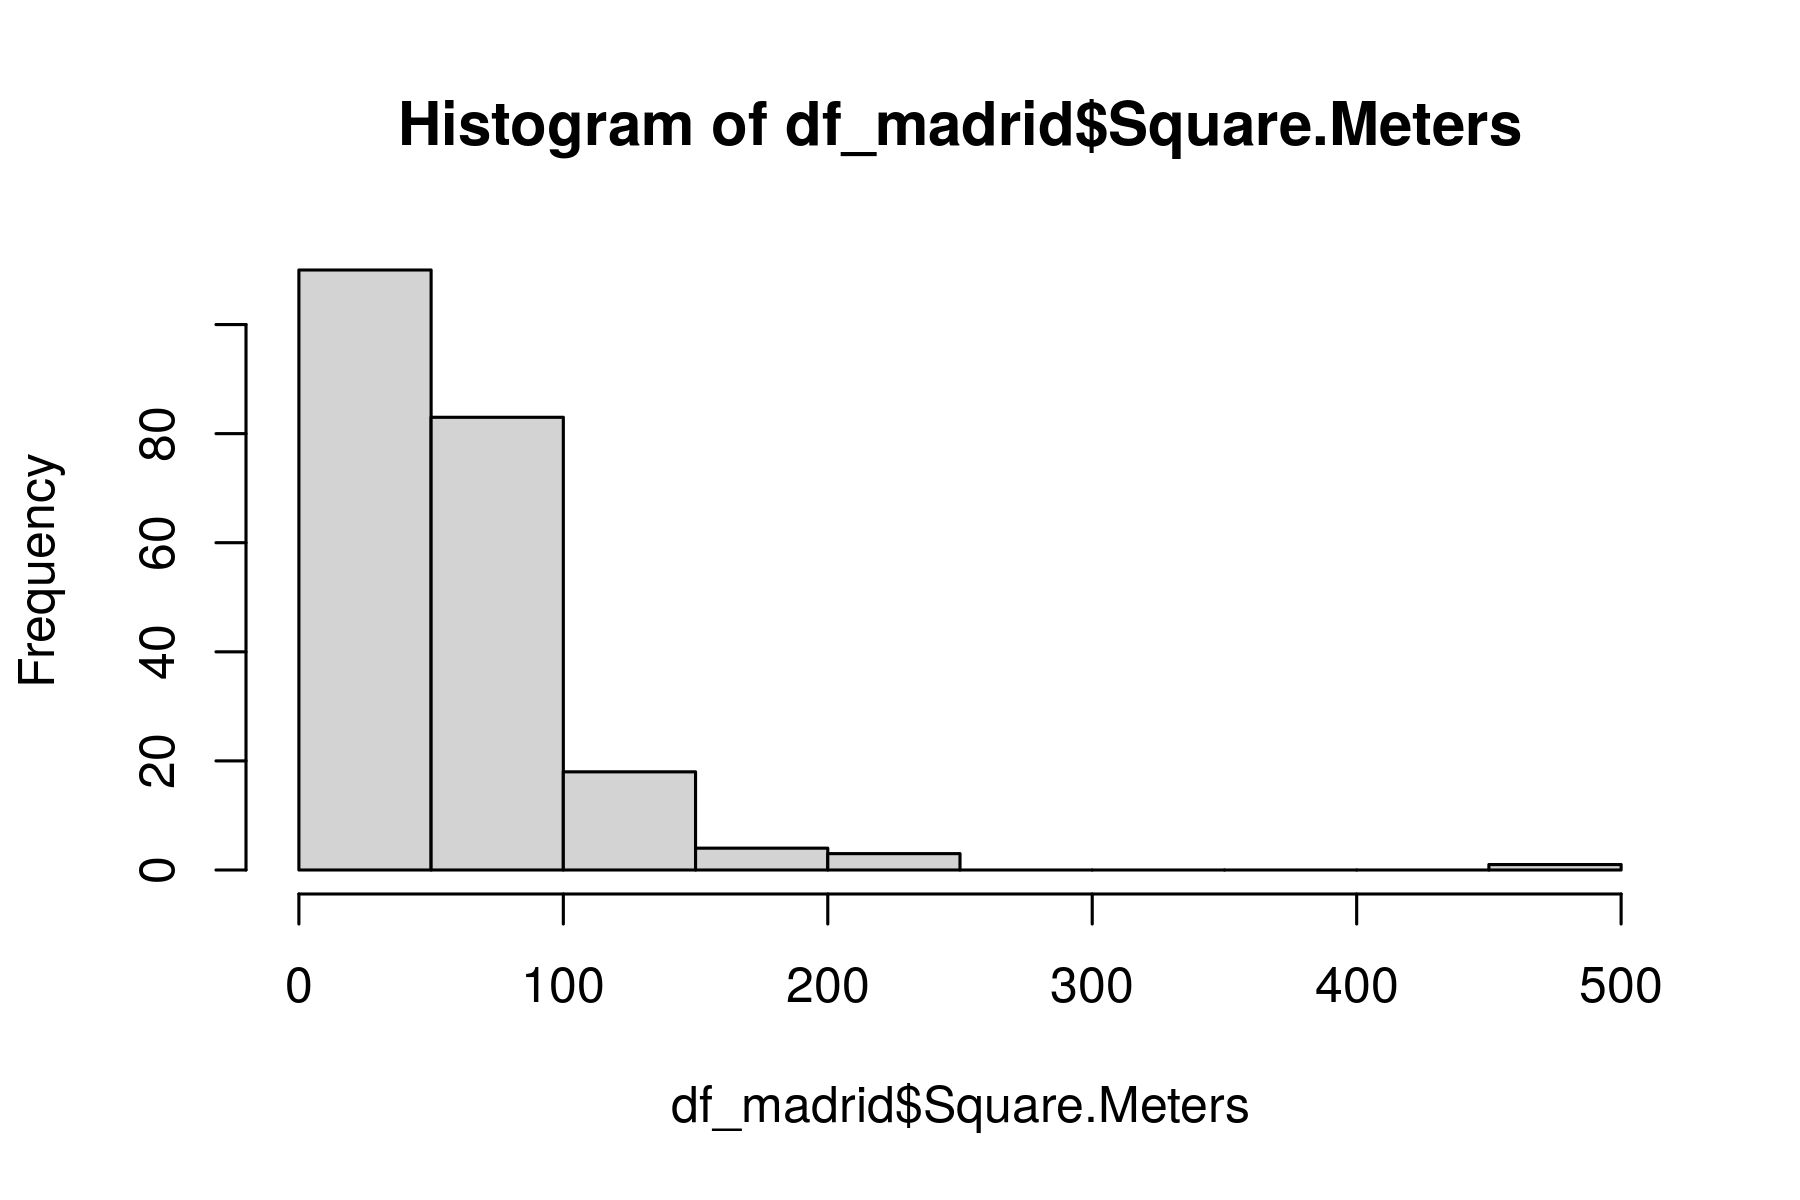

In [8]:
hist(df_madrid$Square.Meters)

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [9]:
df_madrid["Square.Meters"][df_madrid["Square.Meters"] < 20] <- NA
table(df_madrid["Square.Meters"])


 22.018011  24.990907  27.034773  27.963803  30.007669  31.958632  35.024431 
         1          2          1          1          8          2          5 
 36.046364  36.975394  37.997327   39.01926  40.041193  41.992156  44.036022 
         1          2          2          1         10          1          1 
 44.965052  49.981814  51.003747   52.02568  54.998576  56.020509  57.971472 
        15         12          1          1          7          4          2 
 60.015338   60.38695    65.0321  68.004996  69.955959  74.972721  79.989483 
        13          1          9          1         11         12          4 
 82.033349  85.006245  87.979141  90.023007  96.990732  99.963628  104.98039 
         1          3          1          4          1          7          2 
108.046189 109.997152 115.013914 120.030676 124.954535 125.976468 134.988059 
         1          4          1          5          1          1          1 
140.004821 150.038345 158.957033 159.978966 164.995728 200.0201

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [10]:
# Conocer los barrios que tienen todos con NAs
table(is.na(df_madrid$Square.Meters),df_madrid$Neighbourhood)

# Filtro agrupando por barrio los que no tengan NAs
library(dplyr)
df_madrid_clean<-df_madrid |> 
    group_by(Neighbourhood) |>
    filter(!is.na(Square.Meters))

       
        Acacias Adelfas Almagro Almenara Aluche Arapiles Arganzuela Argüelles
  FALSE       3       1       1        5      0        2          0         3
  TRUE       30      25      74       15     81       64          2       115
       
        Atocha Barajas Bellas Vistas Berruguete Carabanchel Castellana Castilla
  FALSE      0       1             0          0           3          3        3
  TRUE       5      10            27         23          73         48       14
       
        Castillejos Centro Chamberí Ciudad Jardin Ciudad Lineal Cortes
  FALSE           0      1        1             1             2      9
  TRUE           35     12       13            17            74    432
       
        Cuatro Caminos Delicias El Tréntaiseis El Viso Embajadores Estrella
  FALSE              2        0              1       1          20        0
  TRUE              43       25              9      17         565        4
       
        Fuencarral-el Pardo Fuencarral-El Par


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

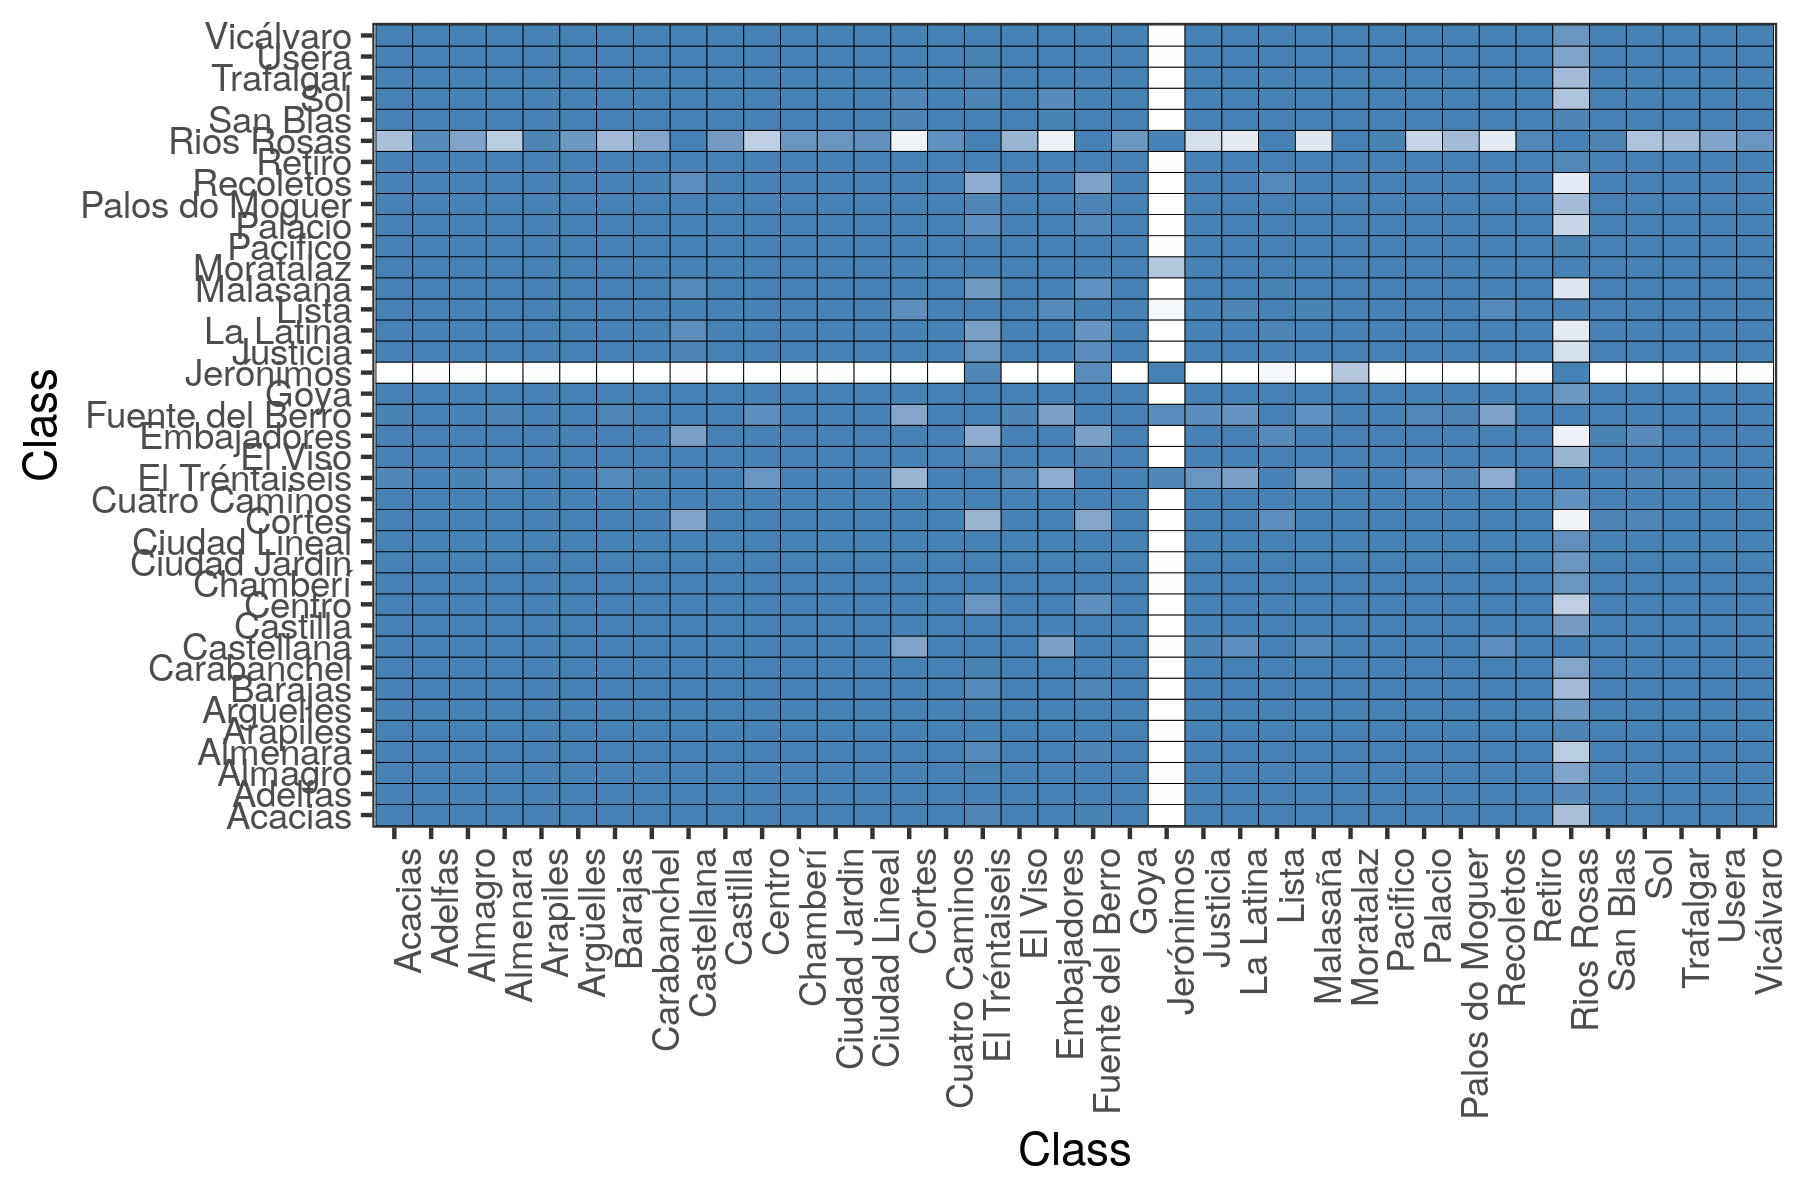

In [11]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid_clean ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid_clean$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.



---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




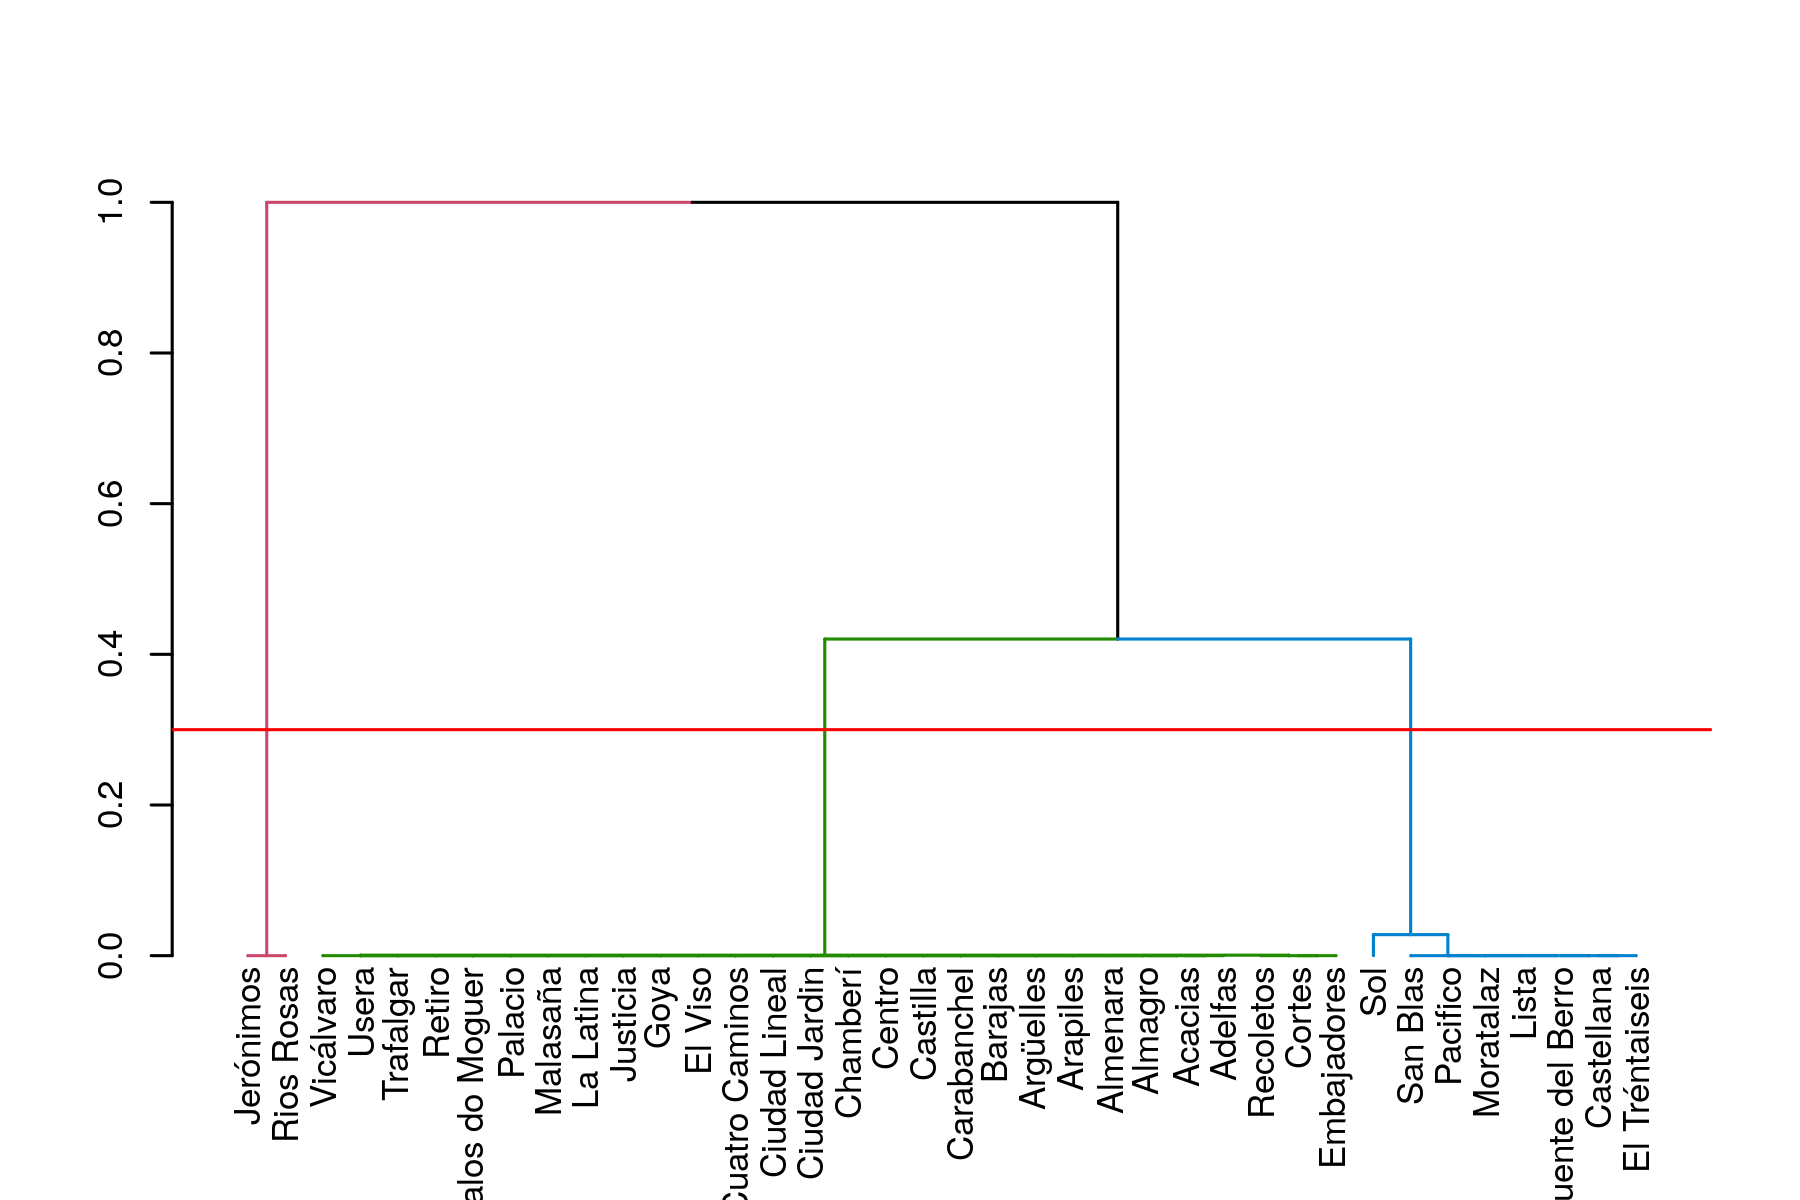

In [12]:
library(dendextend)

d <- as.dist(1 - resm)
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
par(cex=0.7)
plot(color_branches(hcd, h=0.3))
abline(h=0.3, col="red")

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

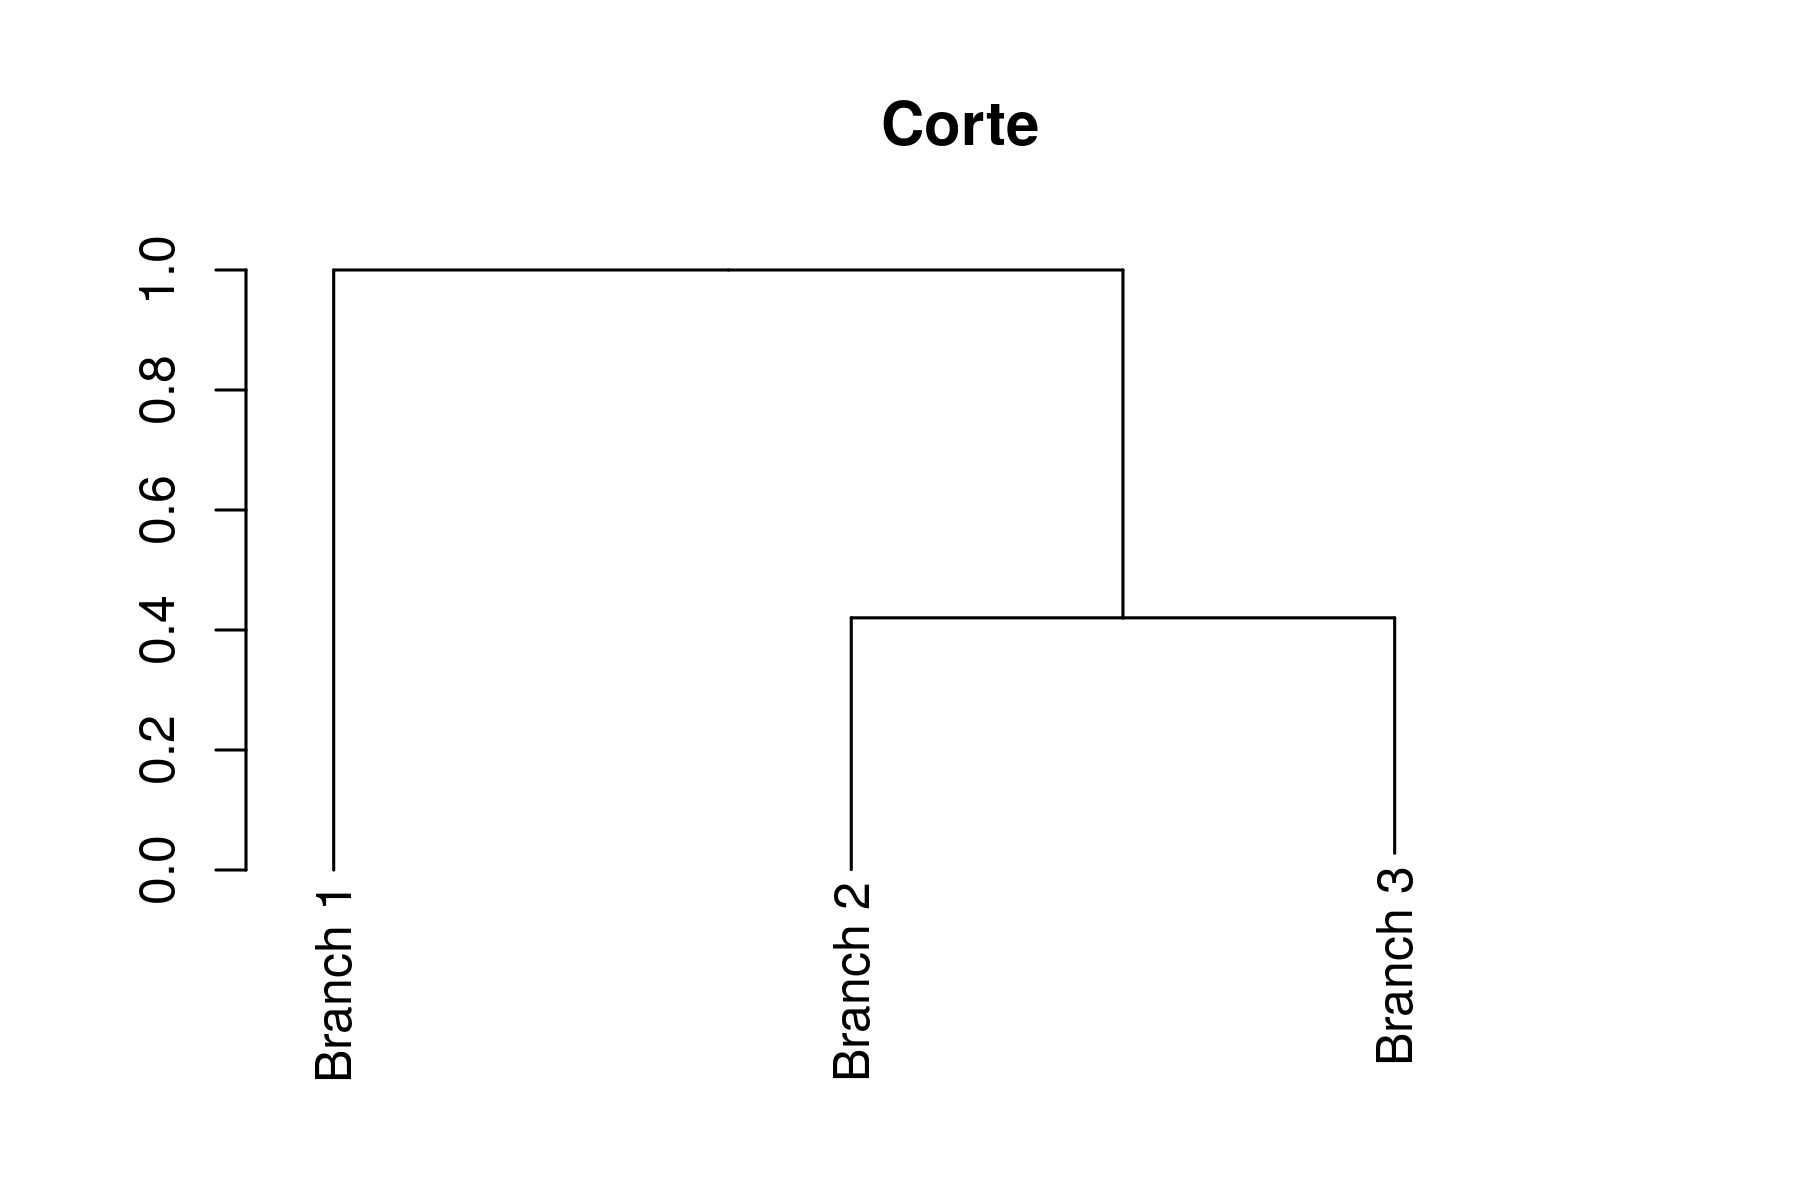

In [13]:
# 0.3
plot(cut(hcd, h = 0.3)$upper, main = "Corte", cex=1)
# 3 clusters

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [14]:
cluster <- cutree(hc,h=0.3)

barrios <- names(cluster[1:length(cluster)])


df_cluster <- data.frame(Neighbourhood = barrios, neighb_id=cluster)

df_madrid_clean <- merge(df_madrid_clean, df_cluster, by = "Neighbourhood")
# Lo añado también en el dataframe con NAs para más tarde utilizarlo
df_madrid <- merge(df_madrid, df_cluster, by = "Neighbourhood")

head(df_madrid_clean)

,Neighbourhood,City,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,Acacias,Madrid,Entire home/apt,4,1.0,1,2,60,753,2,12,85,40.40073,-3.706203,69.95596,1
2,Acacias,Madrid,Entire home/apt,4,1.0,1,2,60,538,2,15,98,40.40513,-3.707726,49.98181,1
3,Acacias,Madrid,Entire home/apt,4,1.0,1,3,68,807,2,10,90,40.39691,-3.705202,74.97272,1
4,Adelfas,Madrid,Entire home/apt,6,1.5,2,6,60,753,2,15,94,40.39912,-3.670071,69.95596,1
5,Almagro,Madrid,Entire home/apt,4,1.0,1,2,75,538,2,10,92,40.43825,-3.693876,49.98181,1
6,Almenara,Madrid,Entire home/apt,4,1.0,0,1,52,431,2,0,53,40.47226,-3.692849,40.04119,1


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [15]:
library(caTools)# required library for data splition
set.seed(123)
split = sample.split(df_madrid_clean, SplitRatio = 0.8)# returns true if observation goes to the Training set and false if observation goes to the test set.

#Creating the training set and test set separately
training_set = subset(df_madrid_clean, split == TRUE)
test_set = subset(df_madrid_clean, split == FALSE)
print("Training")
head(training_set)
print("Testing")
head(test_set)

[1] "Training"


,Neighbourhood,City,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,Acacias,Madrid,Entire home/apt,4,1.0,1,2,60,753,2,12,85,40.40073,-3.706203,69.95596,1
2,Acacias,Madrid,Entire home/apt,4,1.0,1,2,60,538,2,15,98,40.40513,-3.707726,49.98181,1
3,Acacias,Madrid,Entire home/apt,4,1.0,1,3,68,807,2,10,90,40.39691,-3.705202,74.97272,1
4,Adelfas,Madrid,Entire home/apt,6,1.5,2,6,60,753,2,15,94,40.39912,-3.670071,69.95596,1
6,Almenara,Madrid,Entire home/apt,4,1.0,0,1,52,431,2,0,53,40.47226,-3.692849,40.04119,1
7,Almenara,Madrid,Entire home/apt,6,1.5,3,4,170,1507,2,25,87,40.47293,-3.689449,140.00482,1


[1] "Testing"


,Neighbourhood,City,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
5,Almagro,Madrid,Entire home/apt,4,1,1,2,75,538,2,10,92,40.43825,-3.693876,49.98181,1
8,Almenara,Madrid,Entire home/apt,6,2,1,2,67,646,4,0,73,40.47335,-3.691577,60.01534,1
11,Arapiles,Madrid,Entire home/apt,4,1,1,2,65,377,1,0,96,40.43335,-3.705369,35.02443,1
16,Barajas,Madrid,Entire home/apt,2,1,1,1,42,398,2,15,100,40.47606,-3.576178,36.97539,1
21,Castellana,Madrid,Entire home/apt,4,2,2,4,190,1184,1,0,93,40.43080,-3.679928,109.99715,2
24,Castilla,Madrid,Entire home/apt,4,1,2,3,108,915,2,5,96,40.46784,-3.686122,85.00624,1


In [16]:
model<-lm(data=training_set,formula=Square.Meters~Accommodates+neighb_id+Bathrooms+Bedrooms+Beds+Review.Scores.Rating)
summary(model)


Call:
lm(formula = Square.Meters ~ Accommodates + neighb_id + Bathrooms + 
    Bedrooms + Beds + Review.Scores.Rating, data = training_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-110.487  -13.012   -0.766   10.096  174.518 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -74.0395    27.5681  -2.686  0.00829 ** 
Accommodates           3.9323     2.8827   1.364  0.17516    
neighb_id             14.2088     6.1200   2.322  0.02198 *  
Bathrooms             28.8027     6.2562   4.604 1.06e-05 ***
Bedrooms               9.6620     4.2240   2.287  0.02397 *  
Beds                   2.0996     2.9662   0.708  0.48045    
Review.Scores.Rating   0.5550     0.2918   1.902  0.05966 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.62 on 117 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.7013,	Adjusted R-squared:  0.6859 
F-statistic: 45

In [17]:
#Reviso el intervalo de confianza
confint(model)

,2.5 %,97.5 %
(Intercept),-128.63665266,-19.442331
Accommodates,-1.77679285,9.641434
neighb_id,2.08856307,26.329103
Bathrooms,16.41259381,41.192812
Bedrooms,1.29657595,18.027497
Beds,-3.77476000,7.973964
Review.Scores.Rating,-0.02295835,1.132936


In [18]:
library(caret)

print("Training:")
training_set$pred <- predict(model,training_set)
postResample(training_set$pred,obs = training_set$Square.Meters)
print("Testing:")
test_set$pred <-  predict(model,test_set)
postResample(test_set$pred,obs = test_set$Square.Meters)

Loading required package: lattice



[1] "Training:"


RMSE   Rsquared        MAE 
27.8050402  0.7012589 17.3884468

[1] "Testing:"


RMSE   Rsquared        MAE 
16.3316462  0.6465057 11.9220005

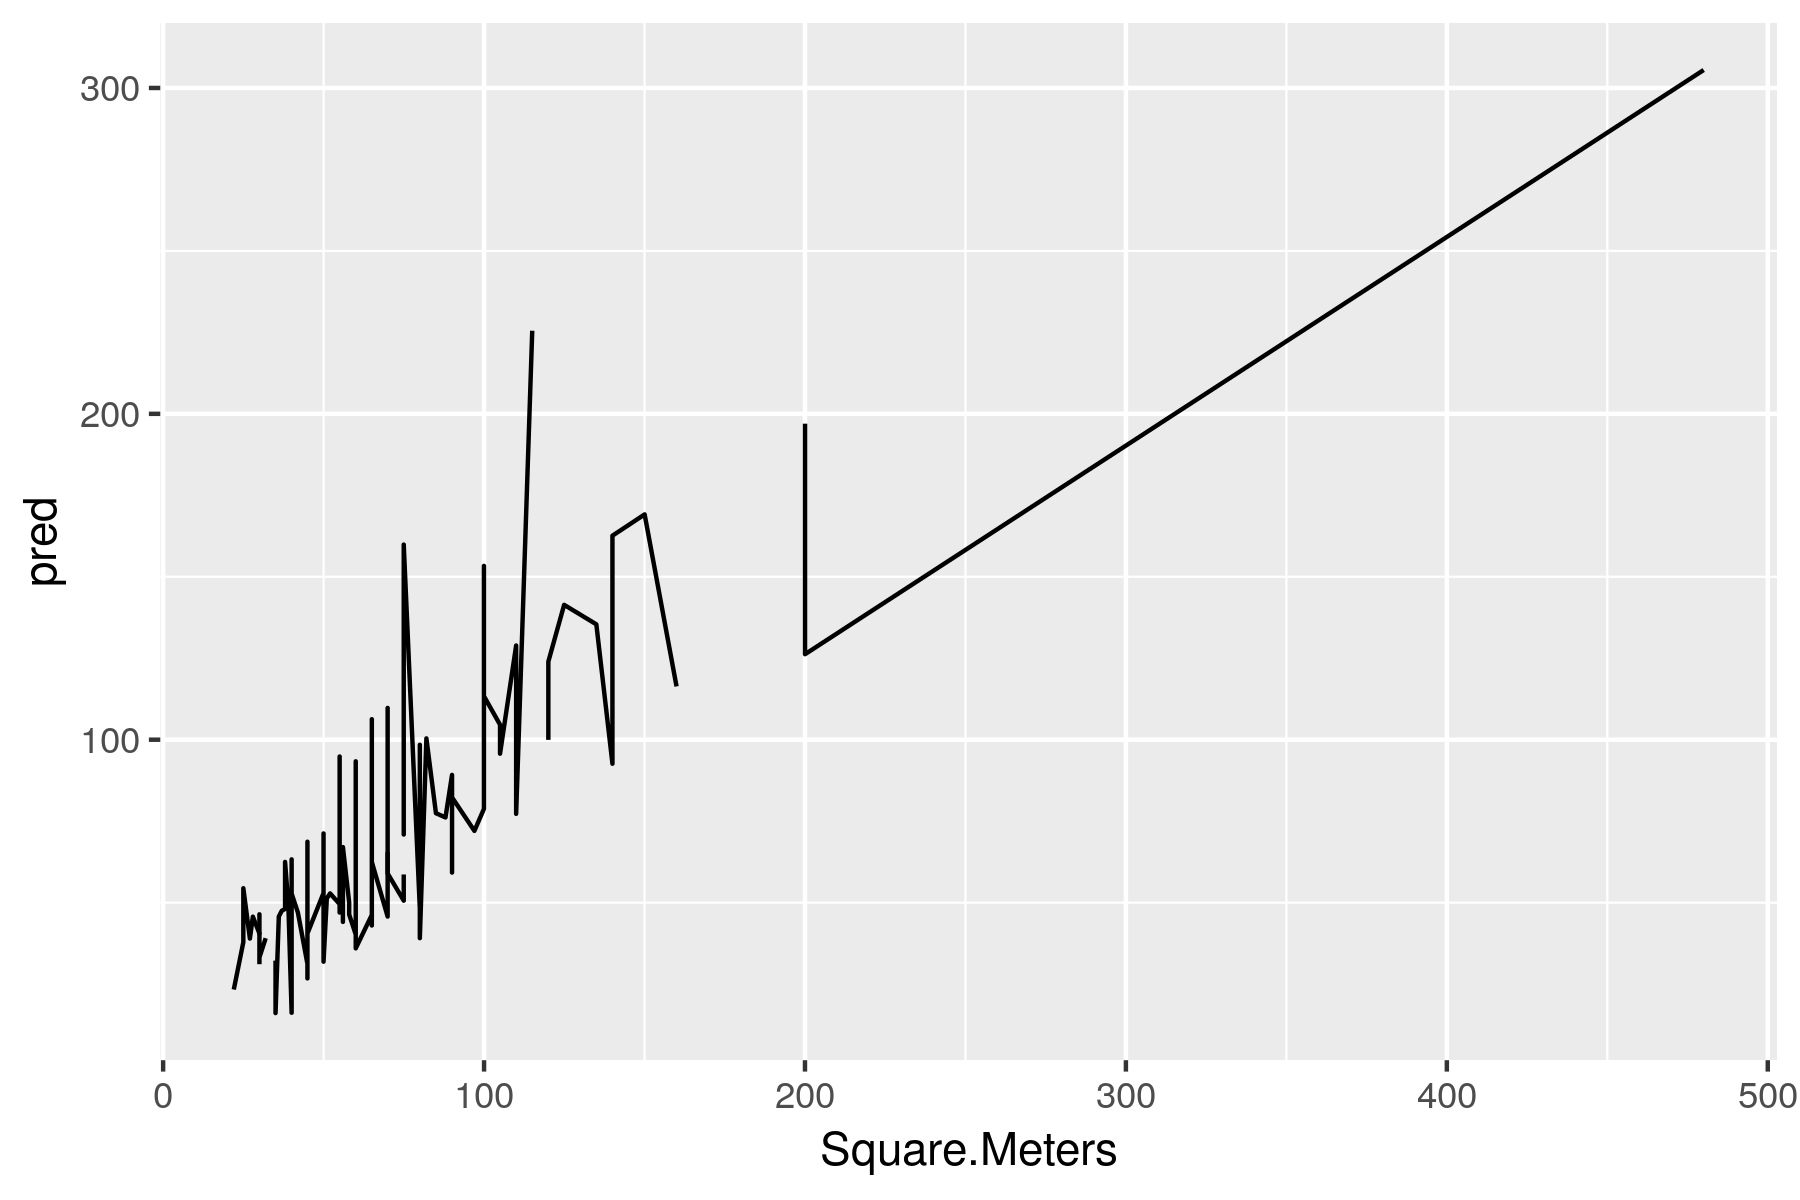

In [19]:
ggplot(training_set,aes(x=Square.Meters,y=pred))+geom_line()

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

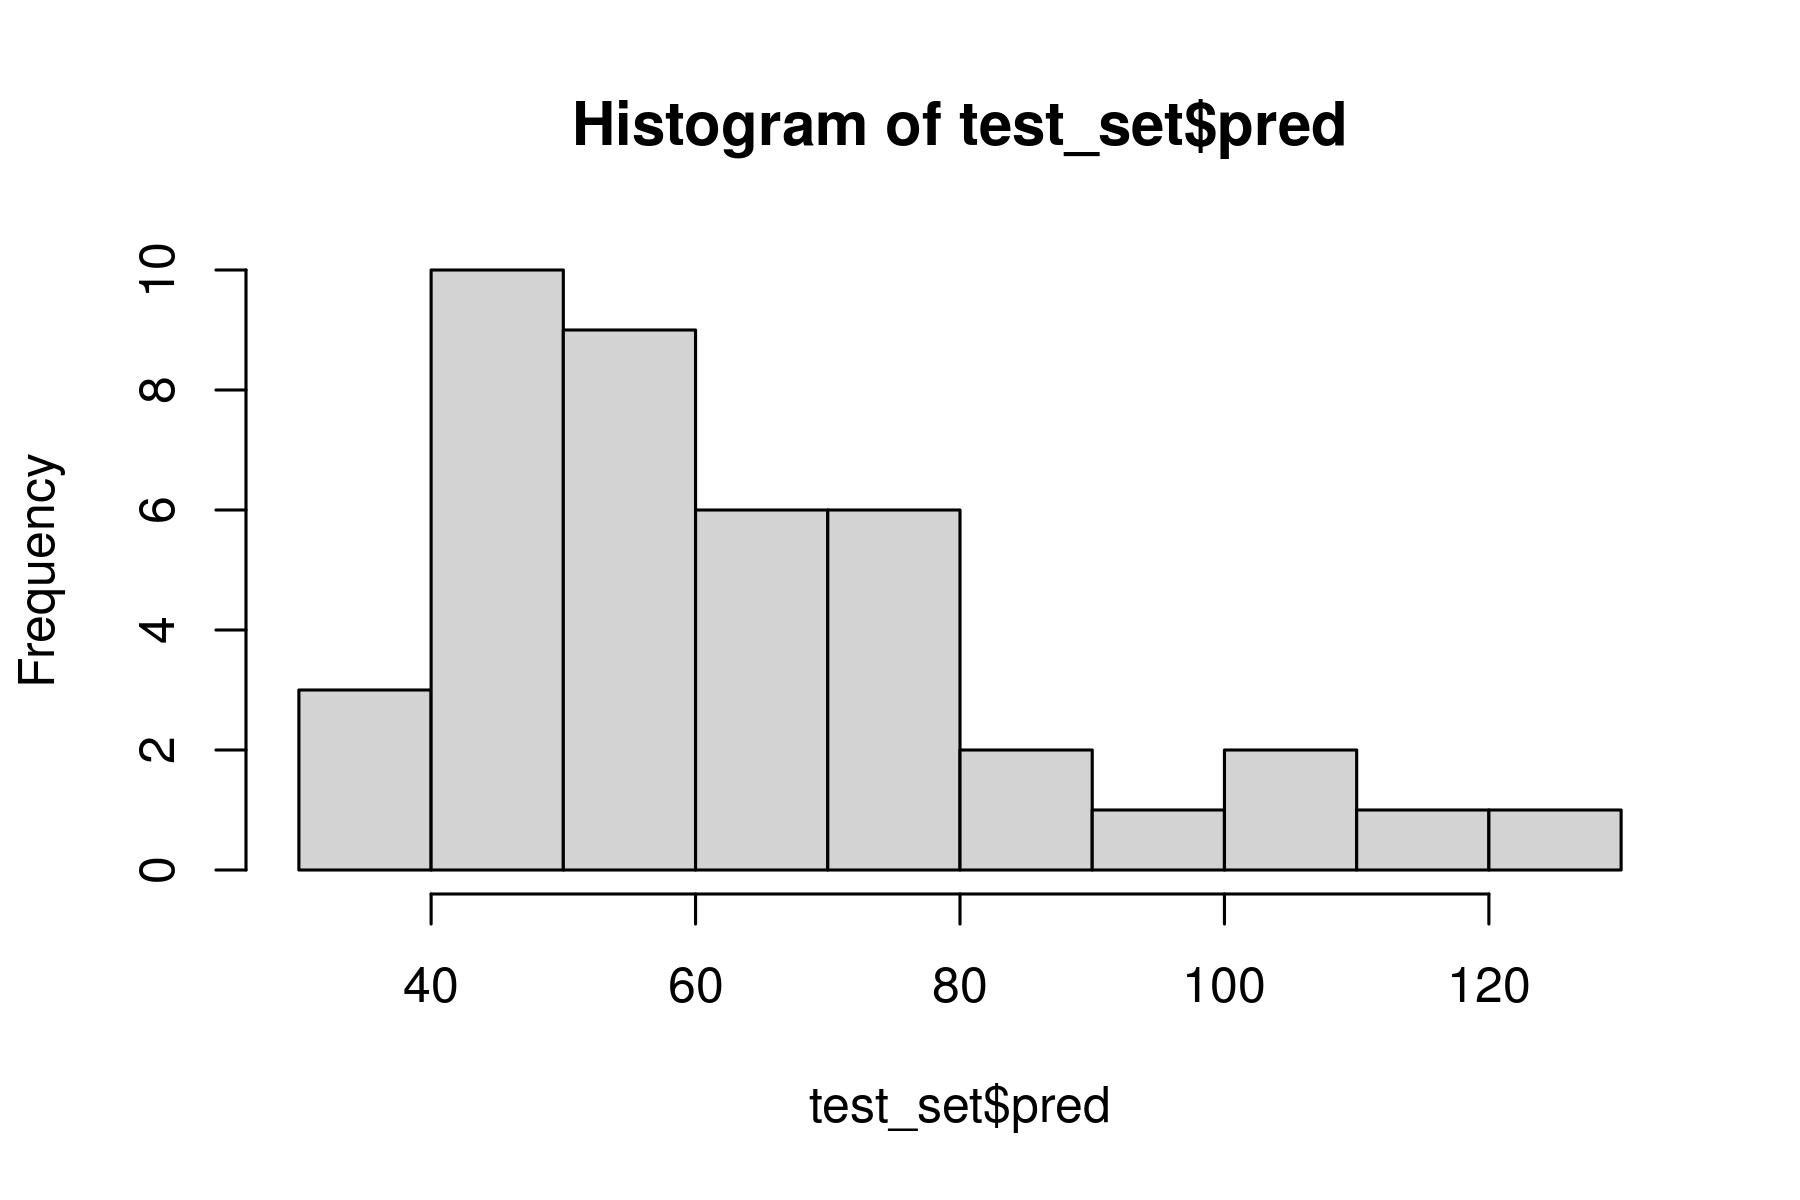

In [20]:
hist(test_set$pred)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [21]:
# Square.Meters~Accommodates+neighb_id+Bathrooms+Bedrooms+Beds+Review.Scores.Rating
predict(model,data.frame(Accommodates=6, neighb_id=1, Bathrooms= 1, Bedrooms=3, Beds=3, Review.Scores.Rating=80))
predict(model,data.frame(Accommodates=6, neighb_id=1, Bathrooms= 1, Bedrooms=4, Beds=3, Review.Scores.Rating=80))
predict(model,data.frame(Accommodates=6, neighb_id=1, Bathrooms= 1, Bedrooms=5, Beds=3, Review.Scores.Rating=80))

1 
72.24998

1 
81.91202

1 
91.57406

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [22]:
# Lo añado también en el dataframe con NAs para más tarde utilizarlo
#df_madrid <- merge(df_madrid, df_cluster, by = "Neighbourhood")

In [23]:
df_madrid

Neighbourhood,City,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
Acacias,Madrid,Entire home/apt,3,1.0,1,1,122,NA,1,0,NA,40.39957,-3.702361,NA,1
Acacias,Madrid,Entire home/apt,6,2.0,3,4,100,NA,1,0,NA,40.40265,-3.702798,NA,1
Acacias,Madrid,Entire home/apt,4,2.0,2,2,65,NA,1,0,88,40.40125,-3.702125,NA,1
Acacias,Madrid,Entire home/apt,2,1.0,1,1,65,NA,1,0,100,40.40233,-3.705738,NA,1
Acacias,Madrid,Entire home/apt,2,1.0,1,1,120,NA,1,0,98,40.40376,-3.712270,NA,1
Acacias,Madrid,Entire home/apt,2,0.5,0,2,30,NA,2,0,81,40.40351,-3.703586,NA,1
Acacias,Madrid,Entire home/apt,3,1.0,2,2,55,NA,1,0,92,40.40367,-3.704810,NA,1
Acacias,Madrid,Entire home/apt,5,2.0,2,2,120,NA,4,20,95,40.40519,-3.706163,NA,1
Acacias,Madrid,Entire home/apt,4,1.0,3,3,60,NA,2,10,91,40.40563,-3.710020,NA,1


In [40]:
df_madrid[is.na(df_madrid$Square.Meters),"Square.Meters"] <- predict(model, df_madrid[is.na(df_madrid$Square.Meters),])

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [41]:
head(df_madrid[,
    c("Accommodates",
      "Bathrooms",
      "Bedrooms",
      "Beds",
      "Price",
      "Guests.Included",
      "Extra.People",
      "Review.Scores.Rating",
      "Latitude",
      "Longitude",
      "Square.Meters"
     )])

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,3,1.0,1,1,122,1,0,NA,40.39957,-3.702361,NA
2,6,2.0,3,4,100,1,0,NA,40.40265,-3.702798,NA
3,4,2.0,2,2,65,1,0,88,40.40125,-3.702125,85.86632
4,2,1.0,1,1,65,1,0,100,40.40233,-3.705738,44.09720
5,2,1.0,1,1,120,1,0,98,40.40376,-3.712270,42.98722
6,2,0.5,0,2,30,2,0,81,40.40351,-3.703586,11.58863


In [42]:
df_madrid_ready <- df_madrid[,
    c("Accommodates",
      "Bathrooms",
      "Bedrooms",
      "Beds",
      "Price",
      "Guests.Included",
      "Extra.People",
      "Review.Scores.Rating",
      "Latitude",
      "Longitude",
      "Square.Meters"
     )]
df_madrid_ready <- na.omit(df_madrid_ready)
head(df_madrid_ready)

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
3,4,2.0,2,2,65,1,0,88,40.40125,-3.702125,85.86632
4,2,1.0,1,1,65,1,0,100,40.40233,-3.705738,44.09720
5,2,1.0,1,1,120,1,0,98,40.40376,-3.712270,42.98722
6,2,0.5,0,2,30,2,0,81,40.40351,-3.703586,11.58863
7,3,1.0,2,2,55,1,0,92,40.40367,-3.704810,55.35125
8,5,2.0,2,2,120,4,20,95,40.40519,-3.706163,93.68356


In [43]:
pr <- prcomp(df_madrid_ready, center = TRUE, scale = TRUE)

pr

Standard deviations (1, .., p=11):
 [1] 2.2264071 1.1755476 1.0280855 1.0157579 0.8216804 0.7709102 0.7040365
 [8] 0.5950021 0.5159265 0.3817109 0.2035578

Rotation (n x k) = (11 x 11):
                            PC1         PC2         PC3          PC4
Accommodates         0.40282768 -0.06072806 -0.00193693 -0.161885234
Bathrooms            0.36153193  0.07327491  0.19592375  0.121495358
Bedrooms             0.38946329  0.01323887  0.12040399 -0.051513771
Beds                 0.38571365 -0.03757158  0.07099430 -0.122702955
Price                0.34054755  0.02959171  0.15807780  0.104969170
Guests.Included      0.29157710 -0.09241126 -0.40413483 -0.152344209
Extra.People         0.13584013 -0.13302536 -0.82342009 -0.075442669
Review.Scores.Rating 0.04750327 -0.10775426 -0.16565988  0.936419805
Latitude             0.01685996  0.69500657 -0.12733913  0.002721279
Longitude            0.03880049  0.68347980 -0.14141510  0.067472651
Square.Meters        0.42787752  0.02133063  0.10991788

In [50]:
numero_pcas = 11
apc <- pr$x[,1:numero_pcas]
apc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
3,0.41995032,-0.7900413,1.62533728,0.0434275670,0.40044223,-1.264699386,0.06155442,1.308568980,0.360483090,0.081422542,0.12382606
4,-1.88668102,-1.1396904,0.71458200,1.2023847048,0.48781929,-0.470476354,-0.22711712,-0.065122089,0.324926850,-0.136937239,0.04217892
5,-1.58202688,-1.3001506,0.95569915,1.0588130275,-0.26627398,-0.544103237,-0.49585165,-0.732958471,0.324934730,-0.159000185,0.02734047
6,-2.92493500,-0.9599782,0.23650732,-1.3164000785,0.95552398,0.001567866,-0.62242240,-0.371337063,-0.614875393,-0.546210306,-0.01978544
7,-0.96200487,-0.9583116,1.02613353,0.1535489773,0.80615409,-0.312205636,0.40435322,0.023433332,0.793373507,-0.244501212,0.04152672
8,2.03786158,-1.2716495,-0.69295804,0.3476249353,-0.11895141,-0.709596258,-1.19215905,0.798600149,0.381540869,0.169807326,0.09259048
9,0.47827975,-1.2852355,0.28898847,-0.3059977360,0.79224594,0.126529817,0.74632312,0.013225434,1.324276692,-0.461263389,0.01894936
10,-1.11296557,-1.2009423,-0.33788586,0.8488451199,0.80785254,-0.132952276,-0.06270807,0.163862971,-0.038739517,-0.229158314,0.04029616
11,-0.28073306,-1.4608908,-0.99394544,-0.5440331595,0.69274032,-0.829349966,0.60464614,0.213039749,0.769948893,0.009365698,0.05870430
13,1.70357372,-1.2603044,-0.33314833,0.0887026300,-0.13451268,-1.235473700,0.58925145,0.924274167,-0.164193514,-0.846586189,0.07790374


In [54]:
piso_prueba <- data.frame(
    Accommodates=3,
    Bathrooms=2,
    Bedrooms=3,
    Beds=3,
    Price=700,
    Guests.Included=2,
    Extra.People=1,
    Review.Scores.Rating=90,
    Latitude=40.40079,
    Longitude=-3.706243,
    Square.Meters=120)

In [58]:
piso_prueba_pr <- predict(pr, piso_prueba)
piso_prueba_pr_filter <- piso_prueba_pr[,1:numero_pcas]
piso_prueba_pr_filter

PC1        PC2        PC3        PC4        PC5        PC6        PC7 
 5.5572340 -0.7248865  3.3848559  1.4437973 -4.2548121 -3.9901306 -3.5264285 
       PC8        PC9       PC10       PC11 
-6.8032585  0.8055947 -0.8276646 -0.6348678

In [59]:
apc[i,]

PC1         PC2         PC3         PC4         PC5         PC6 
 0.41995032 -0.79004129  1.62533728  0.04342757  0.40044223 -1.26469939 
        PC7         PC8         PC9        PC10        PC11 
 0.06155442  1.30856898  0.36048309  0.08142254  0.12382606

In [64]:
dist = {}
for (i in 1:nrow(apc)){
    dist[i] <- sum((piso_prueba_pr_filter-apc[i,])^2)
}
dist

[1] 140.82778 155.10757 132.28213 184.89265 151.77629 123.32338 146.72725
   [8] 161.50446 159.69489 133.46468 159.14310 150.93180 167.91454 148.91931
  [15] 169.13801 154.47398 155.60496 162.44617 145.60228 147.89585 140.55185
  [22] 147.18772 152.05356 150.45321 153.29577 173.70480 181.24168 167.05412
  [29] 164.20058 178.65642 155.04846 163.38379 172.62656 160.74198 116.01179
  [36] 153.07834 172.08093 157.75311 150.46217 146.72113 169.89180 171.60799
  [43] 166.69834 141.43560 149.29554 157.57059 141.55825 170.37871 104.02039
  [50] 158.29669 145.81439 165.14631 179.17302 165.36115 140.39814 164.22171
  [57] 146.35950 136.54243 122.76212  99.84865 171.65400 107.43704 138.73045
  [64] 190.51013 171.22386 135.50464 110.87605 165.24085 133.17285 170.73857
  [71]  96.35690 147.98915 177.13184 147.61052 166.80187 172.40804 139.38656
  [78] 160.82972 171.35584 158.38509 126.53797 171.59524 170.92600 162.68231
  [85] 112.13922 165.41195 186.91861 165.23577 160.05837 146.04705 121.97233
  [92] 149.53669 134.91710 166.27334 175.68394 143.40109 206.52772 211.06761
  [99] 201.12197 197.21222 190.78750 195.55729 203.69680 204.26915 175.72686
 [106] 221.27724 192.86430 178.69991 206.35354 165.04282 147.78826 120.71605
 [113] 162.11112 167.03906 174.13293 153.42462 179.40986 181.19683 188.78516
 [120] 162.00974 145.19076 147.71699 175.53717 139.31338 146.53709 174.65983
 [127] 169.59802 182.26733 120.74459 169.64528 182.14825 157.37074 173.06016
 [134] 144.88302 163.72214 171.39276 164.05017 144.27897 127.29150 157.20395
 [141] 158.36181 178.36683 232.45363 171.98136 160.80331 191.75293 169.53096
 [148] 153.12661 175.39327 125.60337 182.28223 160.24060 155.03446 176.98421
 [155] 159.25295 162.61231 158.82760 156.56069 171.31283 162.50458 169.46036
 [162] 129.34994 135.72241 157.72388 130.38905 151.84031 149.66957 150.25619
 [169] 170.39763 117.88966 171.22842 164.50313 167.20450 161.16990 155.61391
 [176] 167.37045 177.31598 153.24557 168.04763 145.06854 159.11758 145.18063
 [183] 139.41314 147.23324 142.64211 171.21122 149.00256 173.81764 165.69649
 [190] 162.09901 152.25650 159.03112 100.38307 157.70371 227.46453 158.76928
 [197] 163.62402 148.64591 193.72077 141.72730 139.30087 139.85783 141.18969
 [204] 163.37104 143.79342 160.69507 148.61455 135.26829 167.68127 167.82340
 [211] 181.03653 145.48712 147.54922 134.95130 146.56619 144.65206 101.47383
 [218] 110.69385 162.77165 163.66937 103.35900 138.78122 101.72509 189.75110
 [225] 153.40400 126.95110 170.95962 141.95760 141.25001 171.64147 168.82557
 [232] 179.85913 168.41391 134.24275 110.95717 117.93612 154.53815 160.46207
 [239] 158.85836 121.66371 155.56865 137.16392 114.93520 121.78335 110.04870
 [246] 169.00774 158.95924 161.12289 154.45107 129.33428 139.66662 166.43390
 [253] 149.63860 252.93516 250.67924 224.09501 258.18102 195.39912 263.06265
 [260] 215.92261 284.73713 211.11980 214.12706 268.72410 118.32415 162.58394
 [267] 142.74783 169.51133 160.07784 170.04757 157.39952 165.67918 167.23329
 [274] 175.48769 172.28720 158.35063 146.43033 171.02695 144.76902 168.17116
 [281] 142.97964 154.00517 158.90100 172.40222 151.24553 139.00003 144.69774
 [288] 175.52724 165.77237 174.78674 161.21949 161.00079 186.67083 156.93578
 [295] 167.96050 157.98281 180.83653 136.37795 154.12606 162.93566 150.85440
 [302] 144.50771 165.13917 129.40715 154.96210 177.66816 157.99688 147.21241
 [309] 162.08395 158.71584 154.28207 161.63833 157.65411 142.14493 165.61002
 [316] 152.25278 159.30984 166.29415 174.49622 173.02675 161.64052 159.94433
 [323]  65.87216  76.92404 146.53106 140.45839 176.83560 173.20612 149.06852
 [330] 142.56995 139.64600 157.45433 127.42173 104.34956 177.00734 158.72836
 [337] 171.96215 151.64563 100.80530 111.27956 121.32069 166.41600 143.43576
 [344] 168.04531 121.47983  89.97643 173.05942 143.93788 170.27487  38.30671
 [351] 191.99915 179.22836 208.56530 201.81677 198.09225 193.32654 199.47501
 [358] 192.58594 184.51375 186.33732 209.15594 160.92837 190.38429 196.77061

In [65]:
df_madrid_ready[head(order(dist),5),]

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
2944,6,2,2,4,500,3,5,84,40.42339,-3.701293,104.98039
661,6,2,2,4,500,4,15,89,40.41253,-3.697791,98.48515
915,6,2,2,4,500,4,15,96,40.41364,-3.697923,74.97272
2084,6,2,2,5,500,4,12,92,40.42248,-3.698789,102.24972
3887,4,2,2,2,450,1,0,100,40.41782,-3.710278,92.52618


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?